# Neural Network

Neural networks are large systems characterized by linear and non-linear processing. A neural network consists of neurons, also known as nodes or units and synapses connecting the neurons. The synapses not only connect neurons, but also store weights. The neurons are organized into three types:
*   Input: Each feature is an input neuron.
*   Hidden: Each Neuron is a (possibly complex) mathematical function creating a predictor.
*   Output: The neurons gather the predictions and produce the final result.

The function within a neuron consists of two elements:
*   The propagation function which passes the previous outputs in a weighted manner to the next neuron.
*   the activation function, also called transfer function.

An activation function important for classifying multiple classes is the softmax function, also known as normalized exponential function. It takes into account the result of the propagation functions of other neurons. Let $a_j$ be result of the propagation function in the $j^\textrm{th}$ neuron.  If the number of neurons is $K$, then the softmax function maps the $K$-dimensional vector $\mathbf{a} = (a_1, \ldots, a_K)^T$ to a $K$-dimensional vector $\boldsymbol{\sigma}(\mathbf{a})$ with the $j^\textrm{th}$ entry of $\boldsymbol{\sigma}(\mathbf{a})$ being
\begin{equation}
\boldsymbol{\sigma}(\mathbf{a})_j = \frac{\exp(a_j)} {\sum_{k=1}^K \exp(a_k)}.
\end{equation}
Obviously, the elements of $\boldsymbol{\sigma}(\mathbf{a})$ sum to $1$. The softmax function is most often used in the final layer, where the number of synapses is the same as the number of classes, $K$. It gives a probabilistic interpretation to which class the sample, which passed through the neural network, belongs.

Observe how the decision boundaries change with different runs. Also, try different features, activation function in the hidden layer or optimizer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
d = datasets.load_iris()
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# Iris virginica stored in the next 50 entries.

# We consider sepal length and width, the first and second features.
# We consider petal length and width, the third and forth features.
# We train on the entire data.
# Number of samples, and therefore species.
# Two: 100, Three: 150
n = 150
X = d.data[0:n, 2:4] # Features 3 and 4.
y_raw = d.target[0:n].reshape(-1, 1)

# Transform the class labels to 1-of-K representation.
y = OneHotEncoder(sparse=False).fit_transform(y_raw)

# Split into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
 #                                                 test_size=0.25)
# Create model.
nn = keras.models.Sequential()
# Input:
nn.add(keras.Input(shape=(2,)))
# Possible activation functions are: relu, sigmoid, softmax,
# softplus, softsign, tanh, selu, elu, exsponential.
# Hidden layer:
nn.add(keras.layers.Dense(10, activation='relu', name='hidden'))
# Output layer:
nn.add(keras.layers.Dense(3, activation='softmax', name='output'))

# Compile the neural net.
# Possible optimizers are for example sgd (stochastic gradient descent),
# adam (stochastic gradient descent method based on estimation of
# first-order and second-order moments.
nn.compile(optimizer = 'adam',
           loss='categorical_crossentropy', # Labels categorical.
           metrics=['categorical_accuracy'])

# Train the model
nn.fit(X_train, y_train, verbose = 0, batch_size=5, epochs=200)

# Test on unseen data
results = nn.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - categorical_accuracy: 1.0000 - loss: 0.1131
Final test set loss: 0.113093
Final test set accuracy: 1.000000


In [3]:
# Because of 1-of-K representation of the predictions, we need to
# transform them back to labels on a grid to plot.
xsteps = np.linspace(0.8, 7.0, 1000)
ysteps = np.linspace(0.0, 3.0, 1000)
xgrid, ygrid = np.meshgrid(xsteps, ysteps)
xygrid = np.column_stack((xgrid.flatten(),ygrid.flatten()))
p = nn.predict(xygrid)
predict = np.argmax(p, axis = 1)
predict = predict.reshape(xgrid.shape)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step


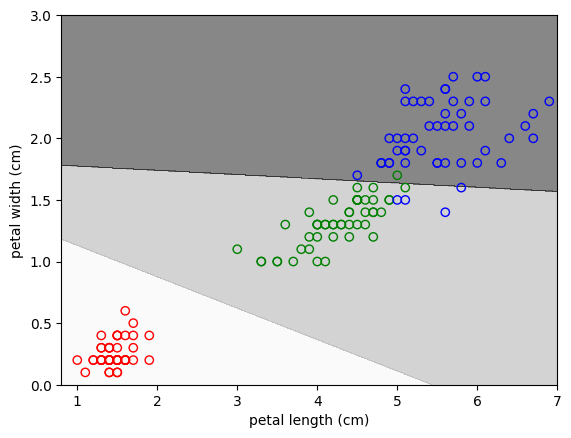

In [4]:
disp = DecisionBoundaryDisplay(xx0 = xgrid, xx1 = ygrid,
                               response = predict,
                               xlabel=d.feature_names[2],
                               ylabel=d.feature_names[3],)
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
disp.plot(cmap = 'Greys', alpha = 0.5)
disp.ax_.scatter(X[:,0], X[:,1],
                     facecolors = 'none',
                     edgecolors = colours[0:n])
plt.show()